# SVM
>由于python中包含二次优化算法的库安装较为麻烦,且大多数采用的SMO算法解决支持向量机训练过程中所产生优化问题的算法.但是在这次的试验中,采用GD的方法同样可以实现最大间隔。

### 加载需要的库并读取数据

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [83]:
X = np.loadtxt("cities.csv", delimiter=',', skiprows=2, usecols=(1,2))
Y = np.loadtxt("cities.csv", delimiter=',', skiprows=2, usecols=(3))
print(X,'\n',Y)

test_X = np.loadtxt("cities.csv", delimiter=',', skiprows=1, usecols=(1,2))[0]
test_Y = np.loadtxt("cities.csv", delimiter=',', skiprows=1, usecols=(3))[0]
print(test_X,test_Y)

[[ 31.23 121.47]
 [ 30.27 120.16]
 [ 29.99 122.21]
 [ 29.87 121.55]
 [ 28.66 121.42]
 [ 27.99 120.7 ]
 [ 26.67 119.55]
 [ 26.07 119.3 ]
 [ 32.8  130.71]
 [ 33.59 130.4 ]
 [ 33.88 130.88]
 [ 34.39 132.46]
 [ 34.66 133.93]
 [ 34.69 135.2 ]
 [ 30.6  114.3 ]
 [ 39.9  116.33]
 [ 35.42 139.46]] 
 [ 1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1.]
[ 25.74 123.47] 0.0


## 极大梯度下降法训练 LinearSVM

In [96]:
def fit(x, y, c=1, lr=0.01, epoch=10000):
    x, y = np.asarray(x, np.float32), np.asarray(y, np.float32)
    w = np.zeros(x.shape[1])
    b = 0.
    for _ in range(epoch):
        w *= 1 - lr
        err = 1 - y * predict(x, w, b, True)
        idx = np.argmax(err)
        # 注意即使所有 x, y 都满足 w·x + b >= 1
        # 由于损失里面有一个 w 的模长平方
        # 所以仍然不能终止训练，只能截断当前的梯度下降
        if err[idx] <= 0:
            continue
        delta = lr * c * y[idx]
        w += delta * x[idx]
        b += delta
    return w,b

def predict(x, w, b, raw=False):
    x = np.asarray(x, np.float32)
    y_pred = x.dot(w) + b
    if raw:
        return y_pred
    return np.sign(y_pred).astype(np.float32)

def genPltLine(w, b, plt):
    x = np.linspace(-2, 2.5)
    y = -(b + w[0] * x)/w[1]

    plt.plot(x,y)
    return plt

In [93]:
w ,b = fit(X, Y)
test_Y = predict(test_X, w, b)
print(test_Y)
print(w, b)

-1.0
[-0.30610427 -1.02292814] 6.659999999999902


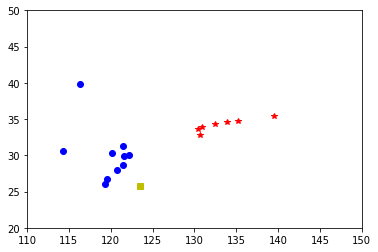

In [95]:
plt.plot(X[Y == 1][:,1], X[Y == 1][:,0],'bo')
plt.plot(X[Y == -1][:,1], X[Y == -1][:,0],'r*')
plt = genPltLine(w, b, plt)
plt.plot(test_X[1], test_X[0], 'ys')
plt.xlim(110,150)
plt.ylim(20,50)
plt.show()

1.0


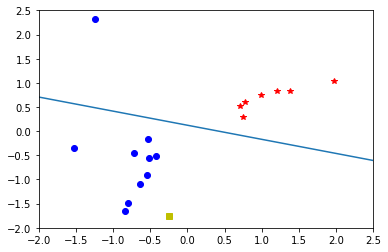

In [97]:
x = X.copy()
x -= X.mean(axis=0)
x /= X.std(axis=0)
_x = test_X.copy()
_x -= X.mean(axis=0)
_x /= X.std(axis=0)
plt.plot(x[Y == 1][:,1], x[Y == 1][:,0],'bo')
plt.plot(x[Y == -1][:,1], x[Y == -1][:,0],'r*')
plt.plot(_x[1], _x[0], 'ys')


w ,b = fit(x, Y)
test_Y = predict(_x, w, b)

print(test_Y)

plt = genPltLine(w, b, plt)

plt.xlim(-2,2.5)
plt.ylim(-2,2.5)
plt.show()


